In [1]:
# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 2277

In [2]:
#時間序列預測模型的概念，是以週期性為前提來進行的預測
#載入、確認資料

df = pd.read_csv('Bike-Sharing-Dataset/day.csv', parse_dates=[1])
df = df.drop('instant', axis=1)
column = [
    '日期',  '季節',  '年份', '月份', '國定假日', '星期幾', '工作日', '天氣', 
    '氣溫', '體感溫度',  '濕度', '風速',
    '臨時用戶租借量', '註冊用戶租借量', '整體用戶租借量'
]
df.columns = column

display(df.head())
display(df.tail())

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


In [3]:
#預處理資料
# #Prophet演算法規定訓練資料輸入變數的個是必須是資料框df，且日期:ds、目標變數:y

#只提取日期與註冊用戶租借量，將換行名建立資料框df2
df2 = df.copy()
df2 = df2[['日期', '註冊用戶租借量']]
df2.columns = ['ds', 'y']

display(df2.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [4]:
#分割資料，用2012-11-1作為分界線
mday = pd.to_datetime('2012-11-1')

train_index = df2['ds'] < mday
test_index = df2['ds'] >= mday

x_train, x_test = df2[train_index], df2[test_index]

#分割日齊資料(用於繪製圖形)
dates_test = df2['ds'][test_index]

In [5]:
#選擇演算法(使用prophet)
from prophet import Prophet
m1 = Prophet(
    yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative'
    )
#m1就為時間序列演算法


Importing plotly failed. Interactive plots will not work.


In [6]:
#訓練，可用Prophet的fit來做訓練
m1.fit(x_train)

#預測
#建出預測用的資料框
#61為欲預測的天數(2012-11-1到2012-12-31)
future_m1 = m1.make_future_dataframe(periods=61, freq='D')

display(future_m1.head())
display(future_m1.tail())

09:09:19 - cmdstanpy - INFO - Chain [1] start processing
09:09:19 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [7]:
#預測
fcst1 = m1.predict(future_m1) #fcst1(預測資料)
display(fcst1.head())
display(fcst1.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,1574.3975,-183.6826,1595.5780,1574.3975,1574.3975,-0.5652,-0.5652,-0.5652,-0.1574,-0.1574,-0.1574,-0.4078,-0.4078,-0.4078,0.0000,0.0000,0.0000,684.5093
1,2011-01-02,1581.4330,-234.7111,1494.4201,1581.4330,1581.4330,-0.6204,-0.6204,-0.6204,-0.2179,-0.2179,-0.2179,-0.4025,-0.4025,-0.4025,0.0000,0.0000,0.0000,600.2707
2,2011-01-03,1588.4684,118.3306,1841.3228,1588.4684,1588.4684,-0.4076,-0.4076,-0.4076,-0.0118,-0.0118,-0.0118,-0.3958,-0.3958,-0.3958,0.0000,0.0000,0.0000,941.0720
3,2011-01-04,1595.5039,180.1384,1950.2762,1595.5039,1595.5039,-0.3120,-0.3120,-0.3120,0.0758,0.0758,0.0758,-0.3878,-0.3878,-0.3878,0.0000,0.0000,0.0000,1097.7127
4,2011-01-05,1602.5393,338.2724,2046.9321,1602.5393,1602.5393,-0.2746,-0.2746,-0.2746,0.1040,0.1040,0.1040,-0.3787,-0.3787,-0.3787,0.0000,0.0000,0.0000,1162.4307


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
726,2012-12-27,5441.0147,2996.7669,4845.9067,5434.6872,5446.9297,-0.2799,-0.2799,-0.2799,0.1315,0.1315,0.1315,-0.4114,-0.4114,-0.4114,0.0000,0.0000,0.0000,3917.8126
727,2012-12-28,5445.8575,2740.5163,4542.0777,5439.3359,5451.9017,-0.3379,-0.3379,-0.3379,0.0758,0.0758,0.0758,-0.4137,-0.4137,-0.4137,0.0000,0.0000,0.0000,3605.6142
728,2012-12-29,5450.7003,1362.8499,3234.2559,5443.9580,5456.9615,-0.5715,-0.5715,-0.5715,-0.1574,-0.1574,-0.1574,-0.4141,-0.4141,-0.4141,0.0000,0.0000,0.0000,2335.4131
729,2012-12-30,5455.5430,1104.7646,2847.6645,5448.4966,5461.9685,-0.6308,-0.6308,-0.6308,-0.2179,-0.2179,-0.2179,-0.4129,-0.4129,-0.4129,0.0000,0.0000,0.0000,2014.3354
730,2012-12-31,5460.3858,2307.2878,4041.5451,5453.2030,5466.9617,-0.4217,-0.4217,-0.4217,-0.0118,-0.0118,-0.0118,-0.4099,-0.4099,-0.4099,0.0000,0.0000,0.0000,3157.8698


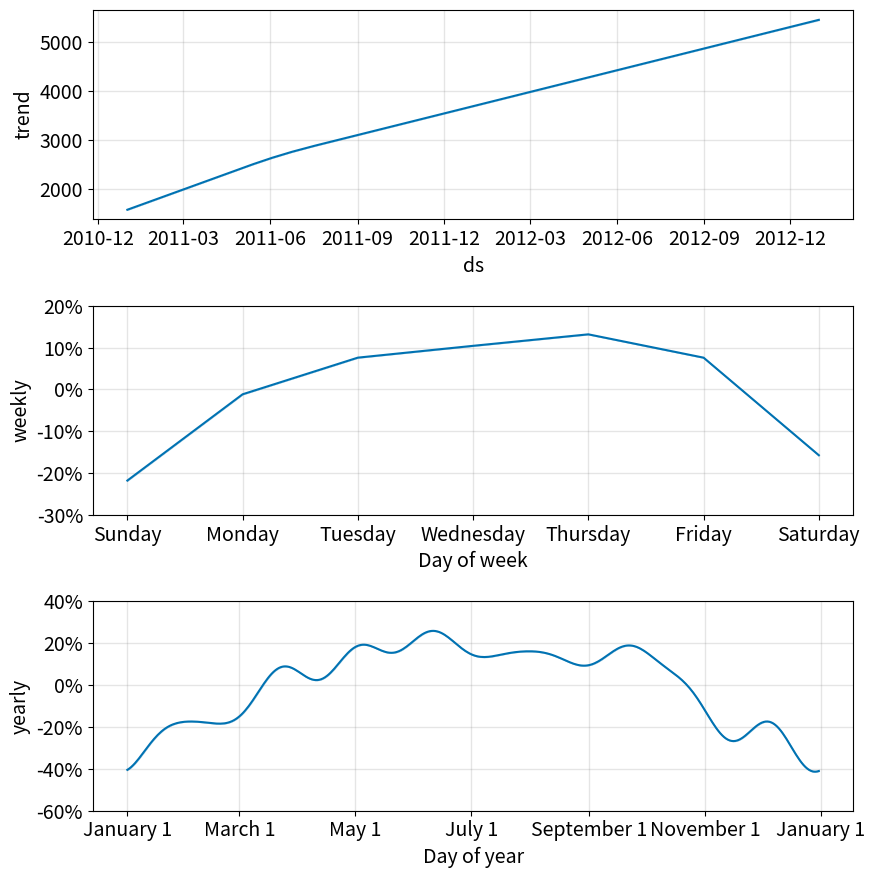

In [8]:
#評估繪製元素的圖形
#現階段為趨勢、週循環及年循環
fig = m1.plot_components(fcst1)
plt.show()

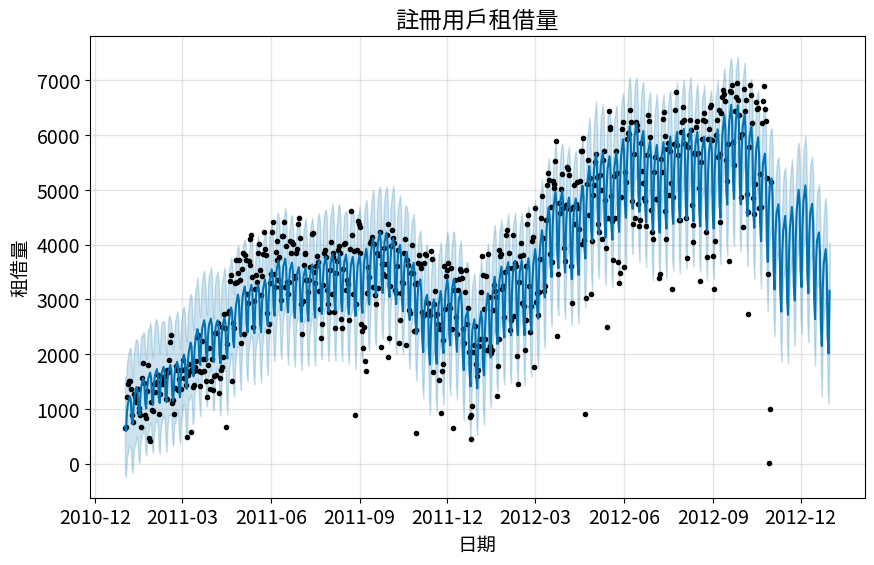

In [9]:
#把訓練資料和驗證資料製成圖
fig, ax = plt.subplots(figsize=(10,6))  #這裡的fig代表的是畫框，與上一步的程式碼fig沒有關係，ax代表畫布(包含x,y,刻度,title等標示圖形)
#繪製預測結果的圖形(prophet演算法的函式)
m1.plot(fcst1, ax=ax)

ax.set_title('註冊用戶租借量')
ax.set_xlabel('日期')
ax.set_ylabel('租借量')

plt.show()

In [10]:
#計算R2值
y_pred1 = fcst1[-61:][['yhat']].values  #提取fcst1資料中的預測未來部分的預測值

y_test1 = x_test['y'].values  #預測期間內的標準答案

from sklearn.metrics import r2_score
score = r2_score(y_test1, y_pred1)

print(f'R2 score: {score:.4f}')

R2 score: 0.3745


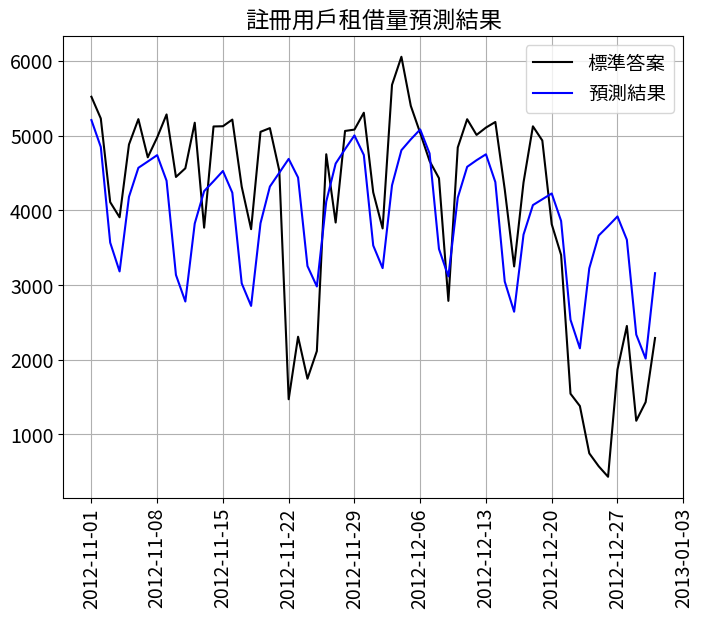

In [11]:
#繪製驗證期間的圖形
#繪製時間序列圖
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8,6))

#利用dates_test = df2['ds'][df2['ds'] >= mday]資料繪圖
ax.plot(dates_test, y_test1, label='標準答案', c='k')
ax.plot(dates_test, y_pred1, label='預測結果', c='b')

#日期刻度間隔
#於每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#將日期刻度標籤文字旋轉90度
ax.tick_params(axis='x', rotation=90)

ax.grid()
ax.legend()  #圖例
ax.set_title('註冊用戶租借量預測結果')
plt.show()

In [14]:
#效果不好，提取其他可能影響的因素
#提取國定假日
#display(df.head())
df_holiday = df[df['國定假日']==1]  #挑出示國定假日的紀錄
display(df_holiday.head())
holidays = df_holiday['日期'].values #將國定假日的日期array放入holidays
display(holidays)

#轉換為資料框格式
df_add = pd.DataFrame({
    'holiday' : 'holi',
    'ds' : holidays,
    'lower_window' : 0, #假日之前幾日會受到影響
    'upper_window' : 0  #假日之後幾日會受到影響
})

display(df_add.head())
display(df_add.tail())

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
16,2011-01-17,1,0,1,1,1,0,2,0.1758,0.1768,0.5375,0.1940,117,883,1000
51,2011-02-21,1,0,2,1,1,0,2,0.3033,0.2841,0.6050,0.3078,195,912,1107
104,2011-04-15,2,0,4,1,5,0,1,0.4467,0.4419,0.6713,0.2264,642,2484,3126
149,2011-05-30,2,0,5,1,1,0,1,0.7333,0.6711,0.6850,0.1312,1549,2549,4098
184,2011-07-04,3,0,7,1,1,0,2,0.7267,0.6654,0.6379,0.0815,3065,2978,6043


array(['2011-01-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-04-15T00:00:00.000000000', '2011-05-30T00:00:00.000000000',
       '2011-07-04T00:00:00.000000000', '2011-09-05T00:00:00.000000000',
       '2011-10-10T00:00:00.000000000', '2011-11-11T00:00:00.000000000',
       '2011-11-24T00:00:00.000000000', '2011-12-26T00:00:00.000000000',
       '2012-01-02T00:00:00.000000000', '2012-01-16T00:00:00.000000000',
       '2012-02-20T00:00:00.000000000', '2012-04-16T00:00:00.000000000',
       '2012-05-28T00:00:00.000000000', '2012-07-04T00:00:00.000000000',
       '2012-09-03T00:00:00.000000000', '2012-10-08T00:00:00.000000000',
       '2012-11-12T00:00:00.000000000', '2012-11-22T00:00:00.000000000',
       '2012-12-25T00:00:00.000000000'], dtype='datetime64[ns]')

,holiday,ds,lower_window,upper_window
0,holi,2011-01-17,0,0
1,holi,2011-02-21,0,0
2,holi,2011-04-15,0,0
3,holi,2011-05-30,0,0
4,holi,2011-07-04,0,0


,holiday,ds,lower_window,upper_window
16,holi,2012-09-03,0,0
17,holi,2012-10-08,0,0
18,holi,2012-11-12,0,0
19,holi,2012-11-22,0,0
20,holi,2012-12-25,0,0


09:21:46 - cmdstanpy - INFO - Chain [1] start processing
09:21:46 - cmdstanpy - INFO - Chain [1] done processing


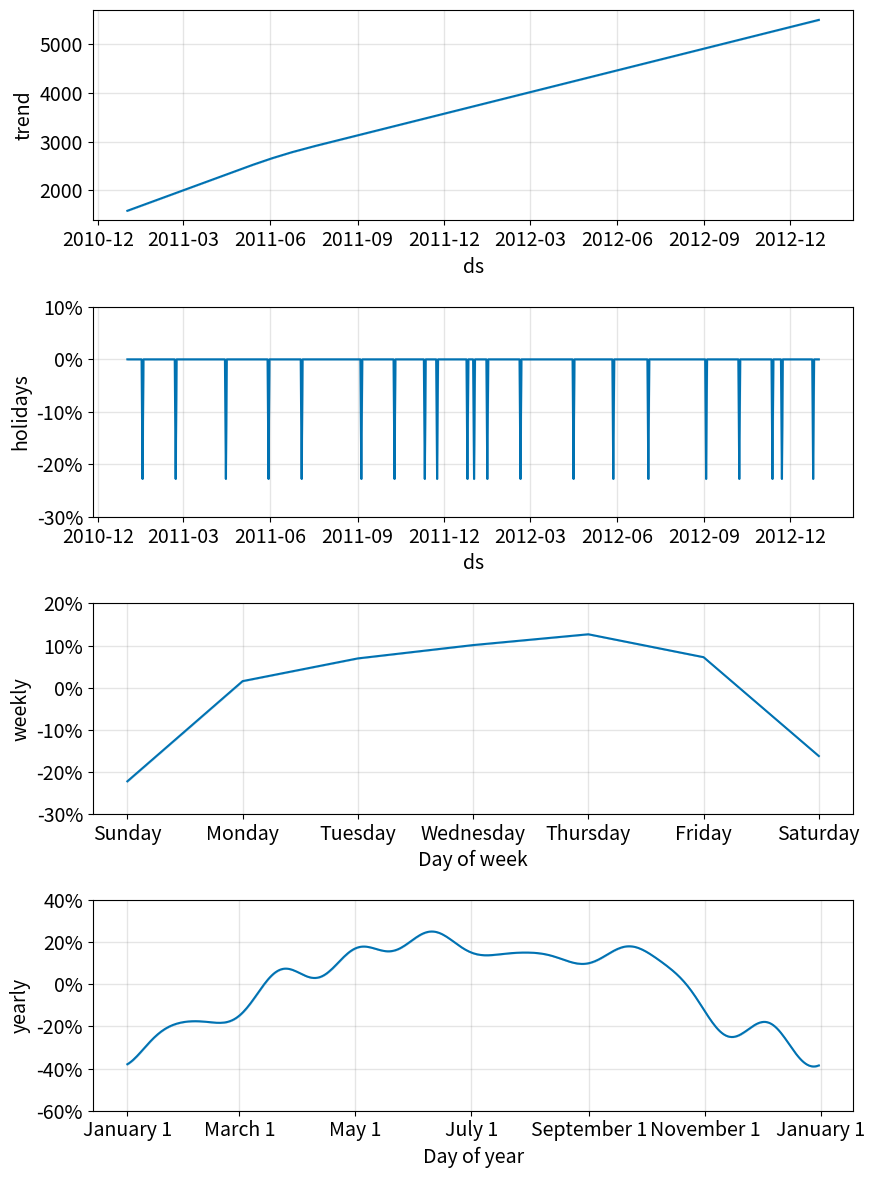

In [15]:
#以國定假日(df_add)為模型輸入

#選擇演算法
#新增holidays參數並生成模型m2
m2 = Prophet(
    yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
    holidays = df_add, seasonality_mode='multiplicative'
    )
#訓練
m2 = m2.fit(x_train)

#預測
fcst2 = m2.predict(future_m1)

#繪製元素圖
fig = m2.plot_components(fcst2)
plt.show()

In [19]:
#計算R2值
y_pred2 = fcst2[-61:][['yhat']].values
y_test2 = x_test['y'].values

score2 = r2_score(y_test2, y_pred2)

print(f'R2 score: {score2:.4f}')

R2 score: 0.4146


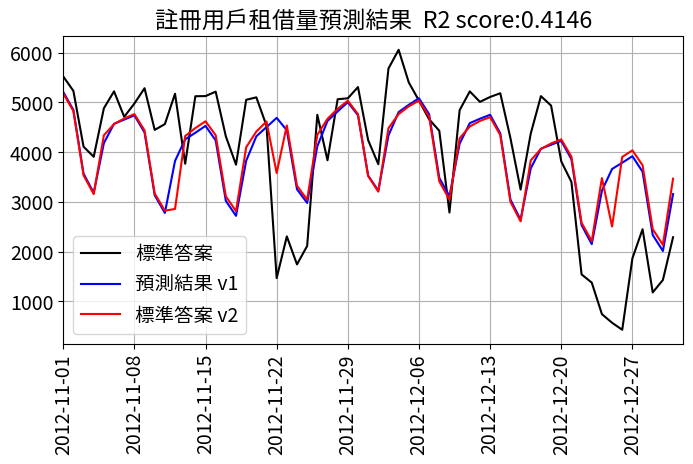

In [22]:
#繪製時間序列圖
fig, ax = plt.subplots(figsize=(8,4))

#圖表內容
ax.plot(dates_test, y_test2, label='標準答案', c='k')
ax.plot(dates_test, y_pred1, label='預測結果 v1', c='b')
ax.plot(dates_test, y_pred2, label='標準答案 v2', c='r')

#日期刻度、每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

# 開始日與結束日
sday = pd.to_datetime('2012-11-1')
eday = pd.to_datetime('2013-1-1')
ax.set_xlim(sday, eday)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title(f'註冊用戶租借量預測結果  R2 score:{score2:.4f}')

# 輸出畫面
plt.show()

In [ ]:
#在訓練資料中新增天氣'氣溫'風速'濕度
df3 = pd.concat([df2, df[['天氣', '氣溫', '風速', '濕度']]], axis=1)

#分割資料
x2_train = df3[train_index]
x2_test = df3[test_index]

display(x2_train.tail()) #確認日期只到2012-10-31

,ds,y,天氣,氣溫,風速,濕度
665,2012-10-27,5209,2,0.5300,0.2357,0.7200
666,2012-10-28,3461,2,0.4775,0.3980,0.6946
667,2012-10-29,20,3,0.4400,0.3582,0.8800
668,2012-10-30,1009,2,0.3182,0.2130,0.8255
669,2012-10-31,5147,2,0.3575,0.1667,0.6667


In [27]:
#選擇演算法

m3 = Prophet(
    yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
    holidays= df_add, seasonality_mode='multiplicative'
)

#利用add_regressor函式將天氣、氣溫、風速、濕度納入模型
for regressor in ['天氣', '氣溫', '風速', '濕度']:
    m3.add_regressor(regressor)

#訓練
m3.fit(x2_train)

11:08:10 - cmdstanpy - INFO - Chain [1] start processing
11:08:10 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#建立預測用輸入資料
future_m3 = df3[['ds', '天氣', '氣溫', '風速', '濕度']]

#預測
fcst3 = m3.predict(future_m3)

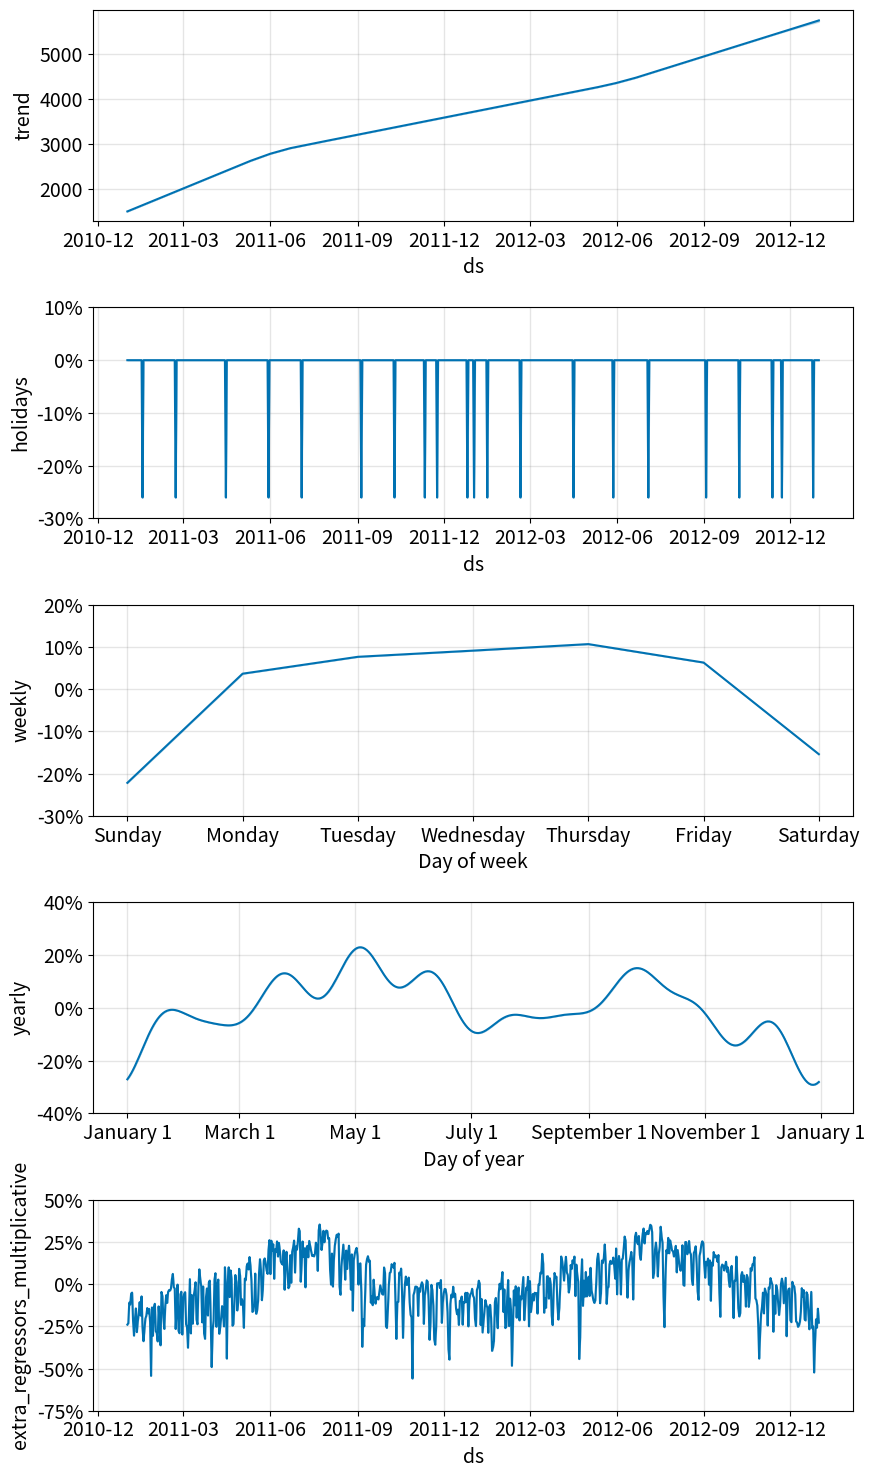

In [30]:
#繪製元素圖
fig = m3.plot_components(fcst3)
plt.show()

In [31]:
#計算R2值
y_pred3 = fcst3[-61:][['yhat']].values
y_test3 = x2_test['y'].values

score3 = r2_score(y_test3, y_pred3)

print(f'R2 score: {score3:.4f}')

R2 score: 0.6195


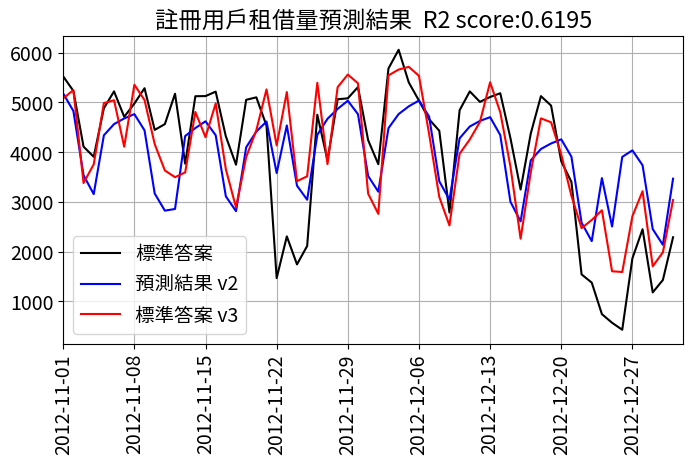

In [32]:
#繪製時間序列圖
fig, ax = plt.subplots(figsize=(8,4))

#圖表內容
ax.plot(dates_test, y_test3, label='標準答案', c='k')
ax.plot(dates_test, y_pred2, label='預測結果 v2', c='b')
ax.plot(dates_test, y_pred3, label='標準答案 v3', c='r')

#日期刻度、每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

ax.tick_params(axis='x', rotation=90)

# 開始日與結束日
sday = pd.to_datetime('2012-11-1')
eday = pd.to_datetime('2013-1-1')
ax.set_xlim(sday, eday)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title(f'註冊用戶租借量預測結果  R2 score:{score3:.4f}')

# 輸出畫面
plt.show()